## Modelling with sklearn: Logistic Regression

**Income Class Prediction using numeric and categorical features**

Get data from google drive with `! gdown 'https://drive.google.com/uc?id=1RgWW3XchePJV-3aXkQDuIwPnNdnR7YaL'`


In [2]:
import gdown
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
! gdown 'https://drive.google.com/uc?id=1RgWW3XchePJV-3aXkQDuIwPnNdnR7YaL'

Downloading...
From: https://drive.google.com/uc?id=1RgWW3XchePJV-3aXkQDuIwPnNdnR7YaL
To: /content/adult-census.csv
100% 5.38M/5.38M [00:00<00:00, 225MB/s]


In [4]:
df = pd.read_csv('/content/adult-census.csv')

In [5]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
df.shape

(48842, 14)

In [7]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class'],
      dtype='object')

In [8]:
df.dtypes

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

In [9]:
df['class'].unique()

array([' <=50K', ' >50K'], dtype=object)

<Axes: >

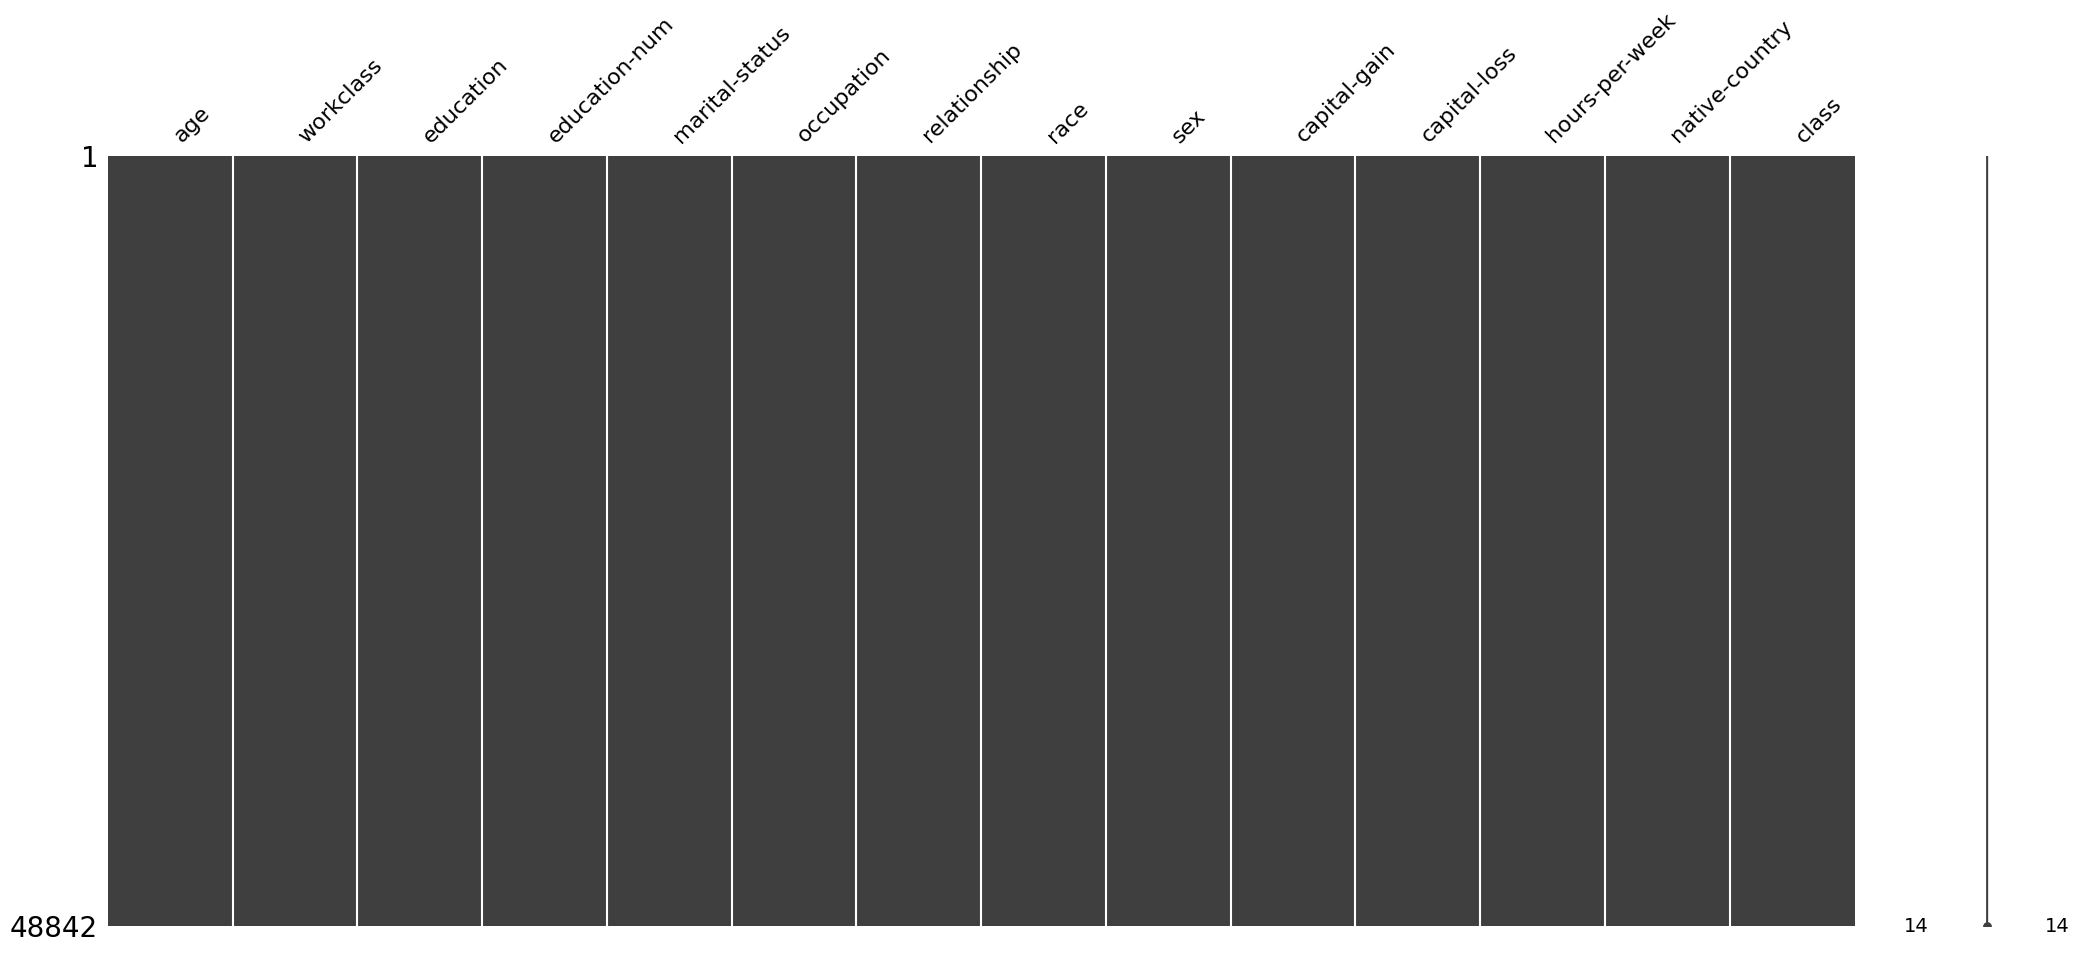

In [10]:
# check for missing values
import missingno

missingno.matrix(df)

In [11]:
cat_features = df.select_dtypes(include='O')

In [12]:
for col in cat_features:
    print(df[col].unique())
    print()

[' Private' ' Local-gov' ' ?' ' Self-emp-not-inc' ' Federal-gov'
 ' State-gov' ' Self-emp-inc' ' Without-pay' ' Never-worked']

[' 11th' ' HS-grad' ' Assoc-acdm' ' Some-college' ' 10th' ' Prof-school'
 ' 7th-8th' ' Bachelors' ' Masters' ' Doctorate' ' 5th-6th' ' Assoc-voc'
 ' 9th' ' 12th' ' 1st-4th' ' Preschool']

[' Never-married' ' Married-civ-spouse' ' Widowed' ' Divorced'
 ' Separated' ' Married-spouse-absent' ' Married-AF-spouse']

[' Machine-op-inspct' ' Farming-fishing' ' Protective-serv' ' ?'
 ' Other-service' ' Prof-specialty' ' Craft-repair' ' Adm-clerical'
 ' Exec-managerial' ' Tech-support' ' Sales' ' Priv-house-serv'
 ' Transport-moving' ' Handlers-cleaners' ' Armed-Forces']

[' Own-child' ' Husband' ' Not-in-family' ' Unmarried' ' Wife'
 ' Other-relative']

[' Black' ' White' ' Asian-Pac-Islander' ' Other' ' Amer-Indian-Eskimo']

[' Male' ' Female']

[' United-States' ' ?' ' Peru' ' Guatemala' ' Mexico'
 ' Dominican-Republic' ' Ireland' ' Germany' ' Philippines' ' Thailan

Some categorical features are found to have values with leading or trailing whitespaces around them, first, we'll remove such white spaces around the values of categorical features. Furthermore, while the dataset doesn't explicitly denote missing values, some features have '?' as a value, indicating probable missing data. We'll address this issue accordingly.

In [13]:
for col in cat_features:
    df[col] = df[col].apply(lambda x: x.strip() if isinstance(x, str) else x)

In [14]:
for col in cat_features:
    print(df[col].unique())
    print()

['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']

['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']

['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']

['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']

['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']

['Male' 'Female']

['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'J

In [15]:
columns_with_question_mark = df.columns[df.apply(lambda x: '?' in x.values)]
columns_with_question_mark

Index(['workclass', 'occupation', 'native-country'], dtype='object')

`workclass`, `occupation`, `native-country` has `?` as a value, let's replace them by nan

In [16]:
df.eq('?').sum()

age                  0
workclass         2799
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

In [17]:
# replacing ? with nan
df.replace('?', np.nan, inplace=True)

In [18]:
df.eq('?').sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [19]:
df.isna().sum()

age                  0
workclass         2799
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

<Axes: >

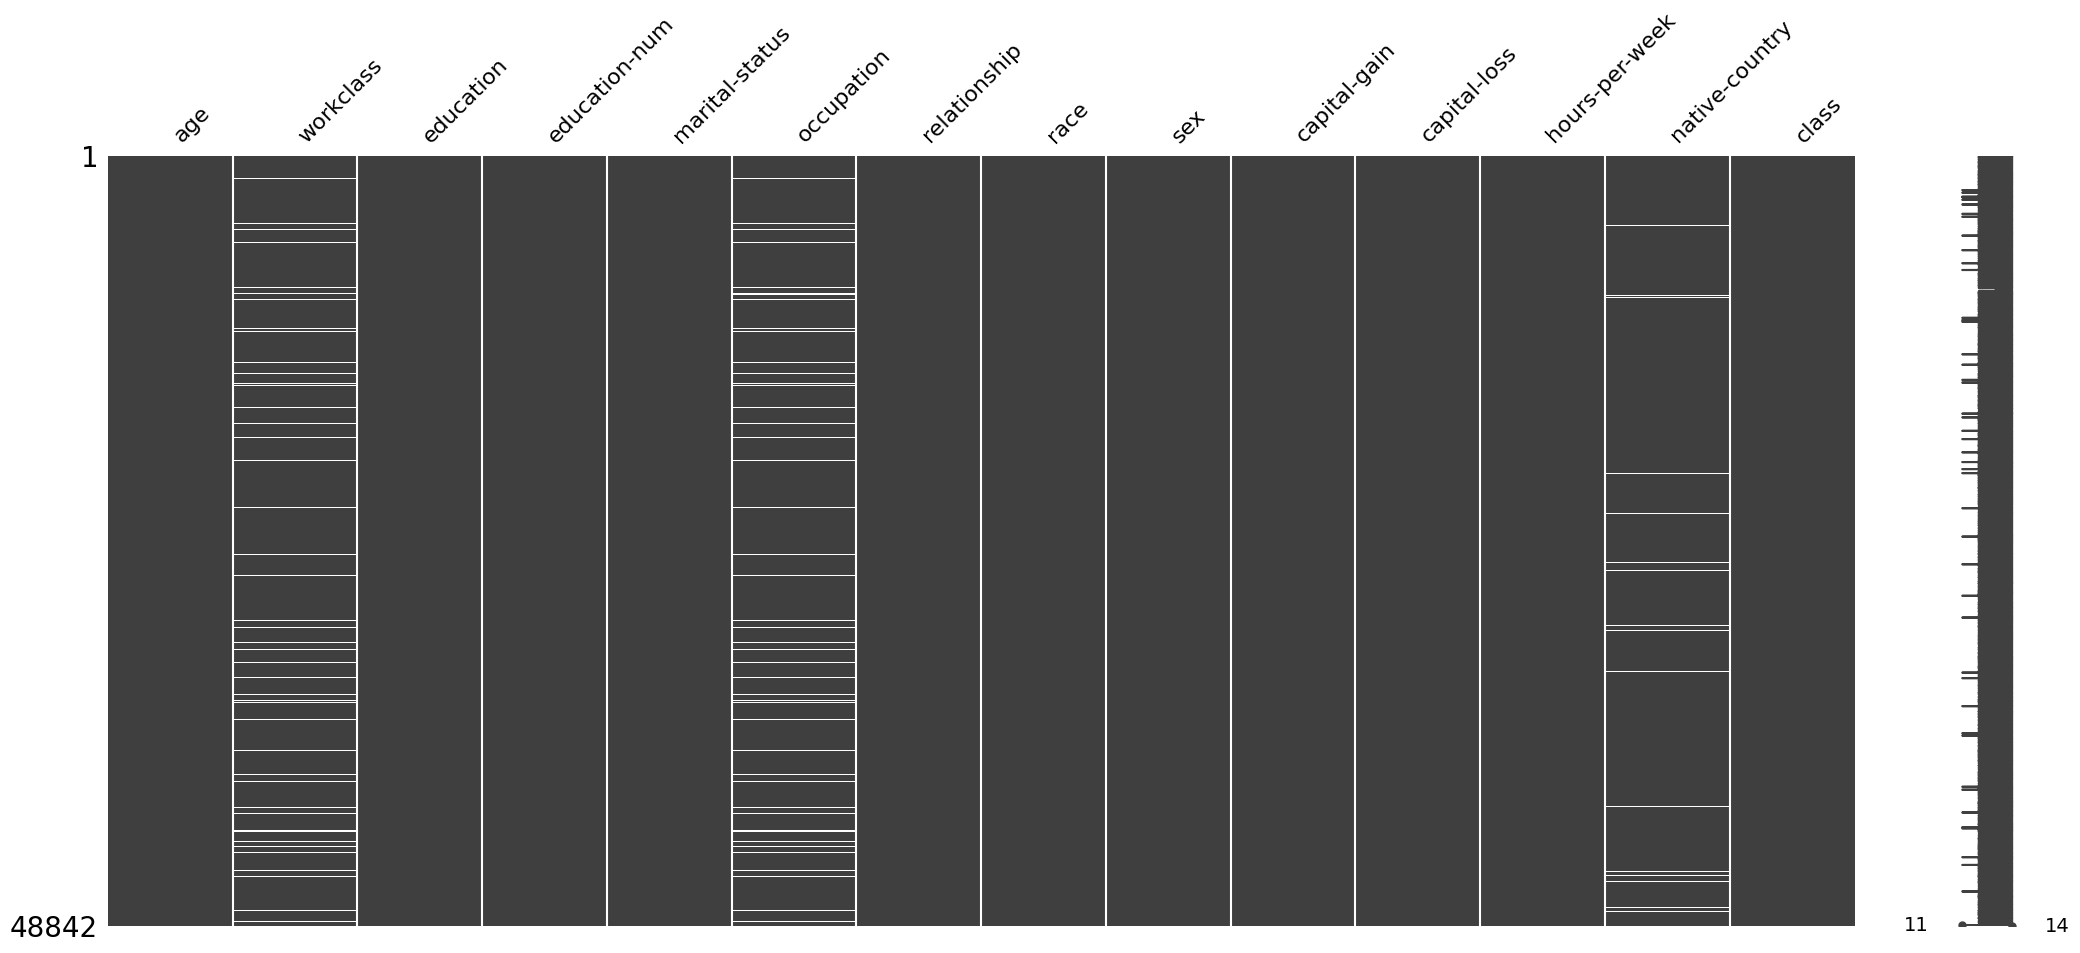

In [20]:
missingno.matrix(df)

In [21]:
# missing values count per column
print('workclass missing values count: ', df[df['workclass'].isna()].shape)
print('occupation missing values count: ', df[df['occupation'].isna()].shape)
print('native-county missing values count: ', df[df['native-country'].isna()].shape)

workclass missing values count:  (2799, 14)
occupation missing values count:  (2809, 14)
native-county missing values count:  (857, 14)


In [22]:
# total numer of rows with nan values count
df.isnull().any(axis=1).sum()

3620

In [23]:
# total numer of rows with nan values count
df[(df['workclass'].isna()) | (df['occupation'].isna()) | (df['native-country'].isna())].shape

(3620, 14)

In [24]:
# missing percentage
'%.2f%%' % ((3620/df.shape[0]) * 100)

'7.41%'

7% of the data are found to be missing.

In [25]:
df.shape

(48842, 14)

In [26]:
df.isnull().any(axis=1).sum()

3620

<Axes: >

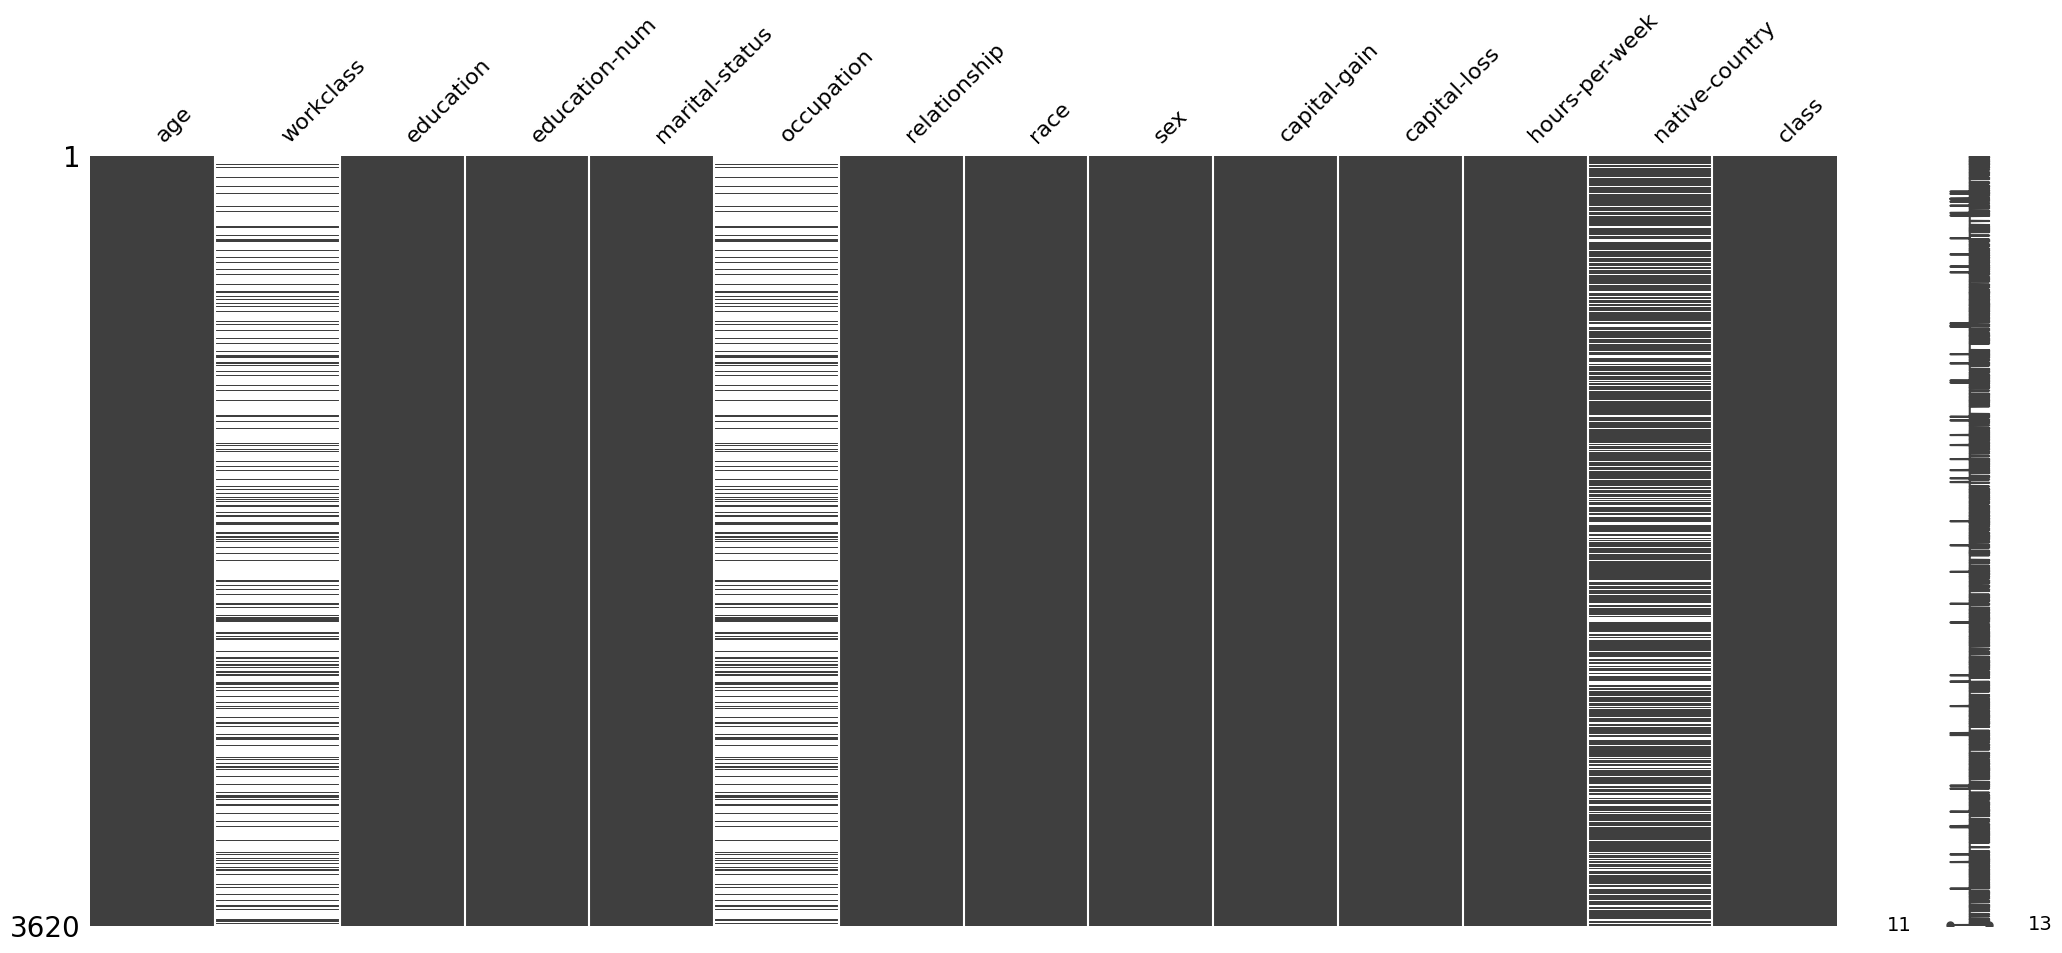

In [27]:
missingno.matrix(df[(df['workclass'].isna()) | (df['occupation'].isna()) | (df['native-country'].isna())])

In [28]:
# Only 7% of the data is missing, so we'll drop those observations for this now
# In real-world scenarios, handling missing data requires considering factors like feature-target correlation,the nature of the data and the specific domain of the dataset
# Since our main focus in this session is to explore the functionality of sklearn, we will not dive deeply into the data wrangling aspects.
df.dropna(inplace=True)

In [29]:
df.shape

(45222, 14)

Now we dont have any missing values but the dataset seems to have two similar features `eduaction` and `education-num` which probably gives us the same info. Understanding the relationship betwn`education` and `education-num`.

In [30]:
from sklearn.compose import make_column_selector

numeric_features = make_column_selector(dtype_exclude=object)(df)
cat_features = make_column_selector(dtype_include=object)(df)


In [31]:
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', '5th-6th',
       'Assoc-voc', '9th', 'Doctorate', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [32]:
pd.crosstab(index=df['education'], columns=df['education-num'])

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,1223,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1619,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,577,0,0,0,0,0,0,0,0
1st-4th,0,222,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,449,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,823,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,676,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1507,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,1959,0,0,0,0,0


In [33]:
df[['education', 'education-num']].head(20)

,education,education-num
0,11th,7
1,HS-grad,9
2,Assoc-acdm,12
3,Some-college,10
5,10th,6
7,Prof-school,15
8,Some-college,10
9,7th-8th,4
10,HS-grad,9
11,Bachelors,13


For every entry in `education`, there is only one single corresponding value in `education-num`. This shows that `education` and `education-num` give us the same information. For example, "education-num"=2 is equivalent to `education`=`1st-4th`. In practice that means we can remove `education-num` without losing information.Having redundant (or highly correlated) columns can be a problem for linear models.


In [34]:
df.drop('education-num', axis=1, inplace=True)

In [35]:
df['class'].unique()

array(['<=50K', '>50K'], dtype=object)

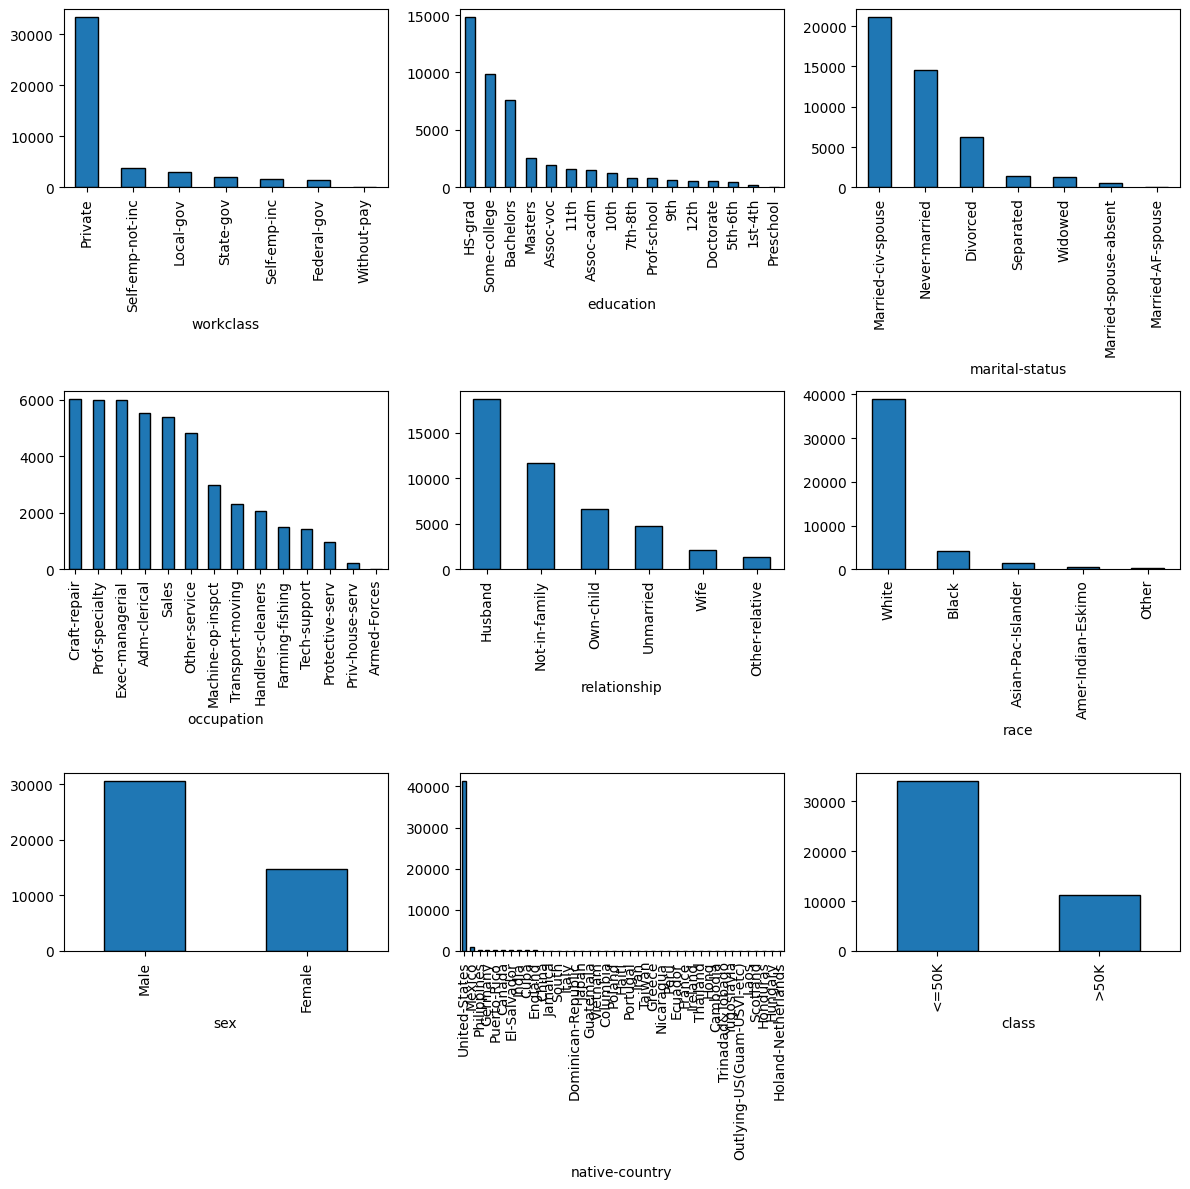

In [36]:
plt.figure(figsize = (12, 12))
plotnumber = 1
for col in cat_features:
    if plotnumber <= len(cat_features):
        ax = plt.subplot(3, 3, plotnumber)
        df[col].value_counts().plot(kind='bar', edgecolor='black')
        plt.xlabel(col)

    plotnumber += 1

plt.tight_layout()
plt.show()

Huge target class imbalance found. Class imbalance is a common challenge in classification tasks, and it can have several implications for model performance and evaluation.

- Bias towards majority class
- Misleading evaluation metrics
- Model generalization

To address this imbalance, resampling techniques can be employed to rebalance the dataset. However, for the current phase, we'll proceed with fitting the model using the existing dataset.

#### Fitting model on numeric feattures

In [37]:
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [38]:
numeric_features

['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [39]:
X = df.drop(columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'class'], axis=1)
y = df['class']


In [40]:
X.head()

,age,capital-gain,capital-loss,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
5,34,0,0,30


In [41]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45222.0,38.547941,13.217870,17.0,28.0,37.0,47.0,90.0
capital-gain,45222.0,1101.430344,7506.430084,0.0,0.0,0.0,0.0,99999.0
capital-loss,45222.0,88.595418,404.956092,0.0,0.0,0.0,0.0,4356.0
hours-per-week,45222.0,40.938017,12.007508,1.0,40.0,40.0,45.0,99.0


Both 'capital-gain' and 'capital-loss' features have a large number of zero values (around 75%). Since the scales of the features are different, it might be beneficial to scale the data before fitting a model.

**Logistic regression** estimates coefficients for each feature to make predictions. When numeric features are on different scales, the coefficients can be influenced disproportionately by features with larger scales. This can lead to biased estimates and suboptimal model performance. Scaling numeric features to a similar range ensures that each feature contributes equally to the model's decision-making process. Common scaling techniques include standardization (subtracting the mean and dividing by the standard deviation) or normalization (scaling to a range between 0 and 1). By scaling numeric features before fitting a logistic regression model, we can improve model convergence, interpretability, and overall performance.

In [42]:
# custom_palette = {'<=50K': 'green', '>50K': 'orange'}
# pair_plot = sns.pairplot(X.join(y), hue=y.name, palette=custom_palette)
# pair_plot.fig.suptitle('Pair Plot of Independent Features with Target', y=1.02)
# plt.show();

Scatter plot shows no multicollinearity(two or more independent variable correlated with each other) between features

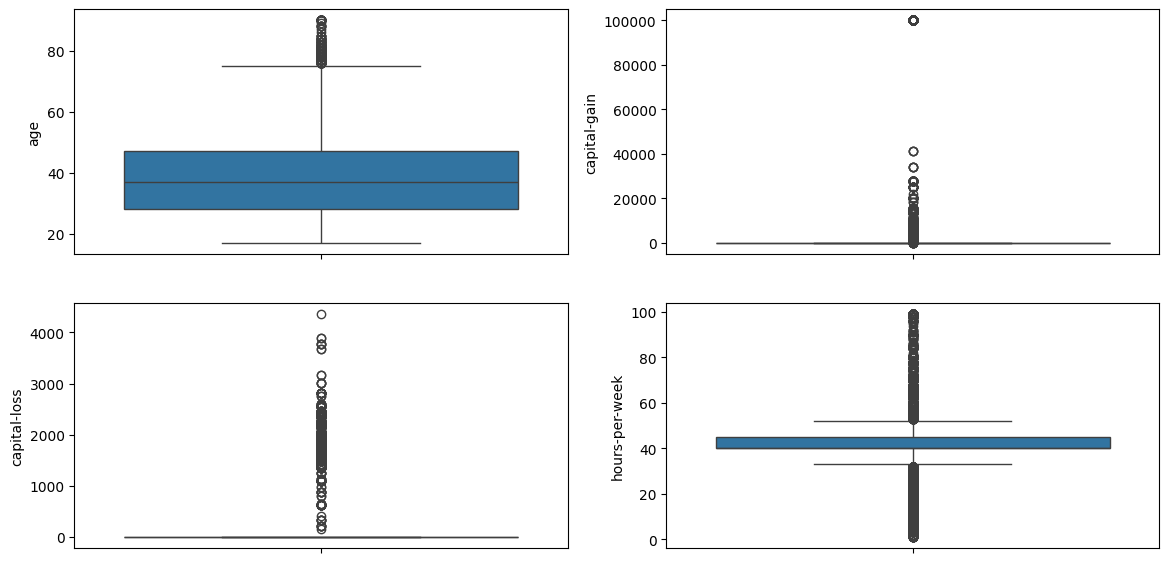

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(14, 7))
axs = axes.flatten()

# Iterate over rows
for fea, ax in zip(X.columns, axs):
    sns.boxplot(data=df[fea], ax=ax)

Since our data contains outliers and is not normally distributed, scaling techniques like `StandardScaler` and `MinMaxScaler` are not appropriate. `StandardScaler` assumes data to be normally distributed and is sensitive to outliers, while `MinMaxScaler` is sensitive to outliers at the extremes of the range. Therefore, we will use `RobustScaler` to scale the data, as it is robust to outliers and uses statistics like the median and interquartile range to scale features. This ensures that all features are brought to a similar range without being heavily influenced by outliers. Although `MaxAbsScaler` could be an option for data centered around 0, it is also sensitive to outliers

However, it's important to be aware of these alternatives and their characteristics for different types of data.


In [44]:
from sklearn.preprocessing import RobustScaler

In [45]:
# splitting data into train test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [46]:
scaler  = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
# here we've not encoded target variables (<=50K and >50K) because logistic regression can directly handle binary outcome
# whether you need to encode the target variable in logistic regression depends on the nature of the classification problem and
# the number of levels in the target variable. For binary classification, encoding is not necessary,
# while for multi-class classification, encoding is often required.

In [48]:
from sklearn.linear_model import LogisticRegression

clf_1 = LogisticRegression()
# fit the model
clf_1.fit(X_train, y_train)
# make prediction
pred_1 = clf_1.predict(X_test)
# model evaluation- r2 score
clf_1.score(X_test, y_test)

0.7879491431730238

r2-score of 0.7879 indicates that 78.7% of variability in target is explainable by independent numeric features.

Sklearn has provided various metrics to evaluate the performance of classification models such as the `classification_report` and `confusion_matrix`.

- Classification Report: A summary of a classification model's performance, providing metrics such as precision, recall, F1-score, and support for each class in the dataset.
- Confusion Matrix: A table visualizing a classification model's performance by comparing predicted class labels with true class labels. It summarizes the number of correct and incorrect predictions for each class.

##### confusion matrix output:

                            | Predicted |
                        ----------------------------
                           | Negative | Positive |
                        ----------------------------
       | Actual | Negative |    TN    |    FP    |
                | Positive |    FN    |    TP    |

                


In [49]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
tn, fp, fn, tp = confusion_matrix(y_test,pred_1).ravel()
tn, fp, fn, tp

(6498, 305, 1613, 629)

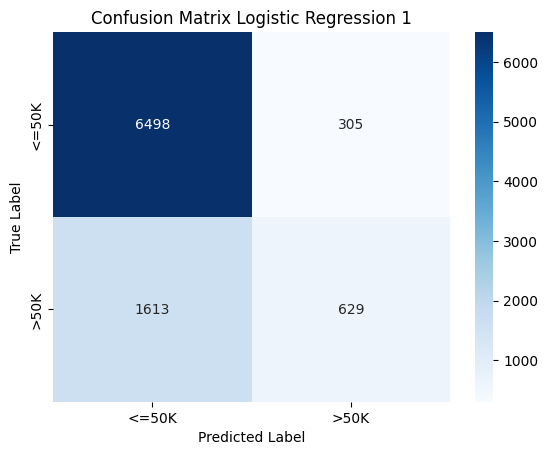

In [51]:
sns.heatmap(confusion_matrix(y_test,pred_1), annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Logistic Regression 1')
plt.show()

- The model has correctly classified 6498 instances as <=50K and 629 instances as >50K.
- The model has incorrectly classified 305 instances as >50K when they are actually <=50K.
- The model has incorrectly classified 1613 instances as <=50K when they are actually >50K.

In [52]:
# We now understand how many instances are correctly predicted and how many are mispredicted
# however, manually counting correct and incorrect predictions to gauge performance can be cumbersome
# fortunately, there are metrics such as recall, precision, and the F1-score, which simplify this assessment
# these metrics can be reviewed in the classification report.
report = classification_report(y_test,pred_1, output_dict=True)
report

{'<=50K': {'precision': 0.8011342621131796,
  'recall': 0.9551668381596354,
  'f1-score': 0.8713960037548611,
  'support': 6803},
 '>50K': {'precision': 0.6734475374732334,
  'recall': 0.28055307760927745,
  'f1-score': 0.39609571788413095,
  'support': 2242},
 'accuracy': 0.7879491431730238,
 'macro avg': {'precision': 0.7372908997932065,
  'recall': 0.6178599578844565,
  'f1-score': 0.633745860819496,
  'support': 9045},
 'weighted avg': {'precision': 0.7694843299249254,
  'recall': 0.7879491431730238,
  'f1-score': 0.7535824890039294,
  'support': 9045}}

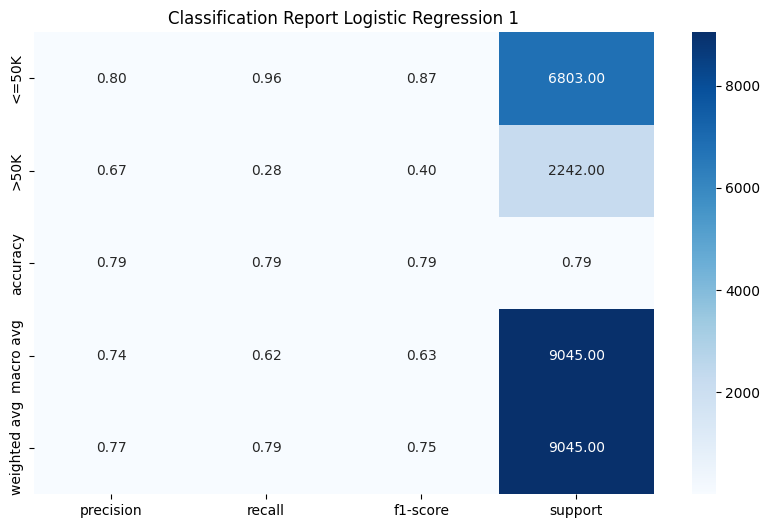

In [53]:
# plotting the metric in heatma for better visualization of scores
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(df_report[['precision', 'recall', 'f1-score', 'support']], annot=True, cmap='Blues', fmt=".2f")
plt.title('Classification Report Logistic Regression 1')
plt.show()

Although the model's overall accuracy stands at a reasonable 79%, its recall for the >50K class is notably low at 0.28. This discrepancy in recall may directly stem from class imbalance. Before looking into class balancing techniques, our next step involves fitting the model with categorical features.

In [54]:
pred_1

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [55]:
# roc_auc_score(y_test, pred_1)

In [66]:
clf_1.predict_proba(X_test
                   )

array([[0.9531833 , 0.0468167 ],
       [0.57741393, 0.42258607],
       [0.70393399, 0.29606601],
       ...,
       [0.63079481, 0.36920519],
       [0.74364759, 0.25635241],
       [0.67562888, 0.32437112]])

In [67]:
clf_1.predict_proba(X_test)[:,1]

array([0.0468167 , 0.42258607, 0.29606601, ..., 0.36920519, 0.25635241,
       0.32437112])

In [65]:
y_test

33772    <=50K
24425     >50K
18227    <=50K
18703    <=50K
37733    <=50K
         ...  
9315     <=50K
46772    <=50K
19291    <=50K
25563    <=50K
19430    <=50K
Name: class, Length: 9045, dtype: object

In [71]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, clf_1.predict_proba(X_test)[:,1])

0.7754297934623218

In [76]:
clf_1.predict_proba(X_test)[:,1]

array([0.0468167 , 0.42258607, 0.29606601, ..., 0.36920519, 0.25635241,
       0.32437112])

In [ ]:
clf_1.predict_proba(X_test)[:,1]

In [84]:
roc_curve(y_test, clf_1.predict_proba(X_test)[:,1], pos_label='>50K')

(array([0.        , 0.        , 0.        , ..., 0.99941202, 0.99970601,
        1.        ]),
 array([0.00000000e+00, 8.92060660e-04, 5.35236396e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([2.        , 1.        , 1.        , ..., 0.01886916, 0.01828608,
        0.01749583]))

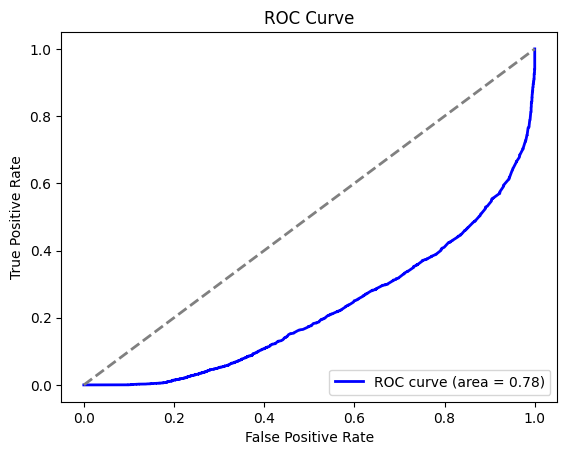

In [89]:
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming y_scores contains the predicted probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, clf_1.predict_proba(X_test)[:,1], pos_label='<=50K')
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, clf_1.predict_proba(X_test)[:,1]))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


### Fitting model on categorical features

In [ ]:
df_2 = df.copy()
df_2.head()

In [ ]:
X = df.select_dtypes(include='O')
X = X.drop(columns=['class'], axis=1) # removing target class from X
y = df['class']


In [ ]:
X

Before fitting the model with categorical data those need to be endoded because most machine learning algorithms require numerical input data. Encoding converts categorical variables into numerical representations, allowing algorithms to process and learn from the data effectively. Without encoding, categorical variables cannot be directly used in most machine learning models, leading to errors or incorrect results.

Nominal and ordinal features are encoded in different way.

- One-Hot Encoding: Use when categorical variables have no ordinal relationship and you want to prevent the model from inferring any ordinality between categories.
- Ordinal Encoding: Suitable for categorical variables with a meaningful ordinal relationship between categories, preserving the ordinality for the model to learn.

In [ ]:
ordinal_features = ['education']
nominal_features = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
category_order = [['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th',
                   'HS-grad', 'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Bachelors',
                   'Masters', 'Doctorate', 'Prof-school']]

In [ ]:
# Create an OrdinalEncoder object with the correct order of categories
edu_encoder = OrdinalEncoder(categories=category_order).set_output(transform='pandas')
ordinal_encoded = edu_encoder.fit_transform(X[['education']])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').set_output(transform='pandas')
nominal_encoded = onehot_encoder.fit_transform(X[nominal_features])

In [ ]:
# we have now encoded X
encoded_X = pd.concat([ordinal_encoded, nominal_encoded], axis=1)
encoded_X.head()

In [ ]:
# perform train test split
X_train, X_test, y_train, y_test = train_test_split(encoded_X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
clf_2 = LogisticRegression(max_iter=1500)
# fit the model
clf_2.fit(X_train, y_train)
# make prediction
pred_2 = clf_2.predict(X_test)
# calcute r2-score
clf_2.score(X_test, y_test)

### Fitting model on both numeric and categorical features

In [ ]:
df_3 = df.copy()
df_3.head()

In [ ]:
# creating a list of numeric and cat features
numerical_features = make_column_selector(dtype_exclude='O')(df_3)
categorical_features = make_column_selector(dtype_include='O')(df_3)
categorical_features = categorical_features[:-1] # dropping target class
target = df_3['class']

In [ ]:
X = df_3.drop(columns=['class'], axis=1)
y = df_3['class']

In [ ]:
# again splitting cat features in ordinal and one-hot because we'll be encoding both using different encoder
ordinal_features = ['education']
nominal_features = ['workclass','marital-status', 'occupation','relationship','race','sex','native-country']

In [ ]:
numeric_features

In [ ]:
categorical_features

In [ ]:
# we already have scaler and encoder object created previously to scale and encode numeric and categoric features respectively
# so we dont need to create it here again, so will be using the same
# we just need to create a pipeline to preprocess features of all kind
scaler = RobustScaler()
ordinal_encoder = OrdinalEncoder(categories=category_order, handle_unknown="use_encoded_value", unknown_value=-1)
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

In [ ]:
scaler

In [ ]:
edu_encoder

In [ ]:
onehot_encoder

In [ ]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    [

        ('ordinal-encoder', ordinal_encoder, ordinal_features),
        ('one-hot-encoder', onehot_encoder, nominal_features),
        ('robust_scaler', scaler, numerical_features),
    ]

)

In [ ]:
# splitting data into train test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# now create a pipeline of model and preprocessor
from sklearn.pipeline import Pipeline

clf_3 = LogisticRegression(max_iter=1500)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', clf_3)
])


In [ ]:
pipeline

In [ ]:
# The pipeline automates the process of fitting, transforming, encoding, and other tasks, we dont need to do everthying manually
# fit the model
# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
pred_3 = pipeline.predict(X_test)

# evaluation
pipeline.score(X_test, y_test)

In [ ]:
sns.heatmap(confusion_matrix(y_test,pred_1), annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Logistic Regression 1')
plt.show()

Including both numeric and cat feature resulted in better r2-score than individual cat and numeric feature models.

### Handling class imbalance

In [ ]:
df_4 = df.copy()
df_4.head()

In [ ]:
X = df.drop(columns=['class'], axis=1)
y = df['class']

In [ ]:
labels = df_4['class'].value_counts().index
count = df_4['class'].value_counts().values
plt.title('Income Distribution')
plt.pie(x=count, labels=labels, autopct='%1.1f%%');

In [ ]:
# ! pip install imbalance-learn

In [ ]:
from imblearn.over_sampling import RandomOverSampler
# from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# oversampling the minority class
oversampler = RandomOverSampler(sampling_strategy='minority')

In [ ]:
X_over, y_over = oversampler.fit_resample(X, y)

In [ ]:
label_samp = y_over.value_counts().index
count_samp = y_over.value_counts().values
plt.title('Pie Chart::Sampled data')
plt.pie(x=count_samp, labels=label_samp, autopct='%1.1f%%');

Now our dataset is balanced let's fit the pipeline we defined above again on the balanced dataset and see the result.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, random_state=42, test_size=0.2)

In [ ]:
# fitting model
pipeline.fit(X_train, y_train)
# prediction
pred_4 = pipeline.predict(X_test)
pipeline.score(X_test, y_test)

In [ ]:
report = classification_report(y_test, pred_4, output_dict=True)
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(df_report[['precision', 'recall', 'f1-score']], annot=True, cmap='Blues', fmt='.2f')
plt.title('Classification Report GradientBoosting Clf 2')
plt.show()

Following class balancing, despite the reduction in the R2 score from 0.84 to 0.81, there has been a significant improvement in the recall score for the >50K class.

In [ ]:
# model evaluationj with cross validation
from sklearn.model_selection import cross_validate

cv_result = cross_validate(pipeline, X, y, cv=5)
scores = cv_result['test_score']

print(
    "The mean cross-validation r2-score is: "
    f"{np.abs(scores.mean()):.3f} ± {scores.std():.3f}"
)

In [ ]:
# save the model
import joblib

joblib.dump(pipeline, 'income_predictor.pkl')

In [ ]:
joblib.load('income_predictor.pkl')

In [ ]:
# save model with pickle
import pickle

with open('clf_pickle.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

In [ ]:
# load the saved model
with open ('clf_pickle.pkl', 'rb') as file:
  pickle_model = pickle.load(file)

In [ ]:
pickle_model